In [1]:
import pandas as pd
import numpy as np
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.firefox.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
import pickle as pkl
from pprint import pprint
import time

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn import linear_model 

In [2]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [4]:
df['match_stadium'].unique()

array(['Emirates Stadium, London', 'Macron Stadium, Bolton',
       'Goodison Park, Liverpool', 'Sports Direct Arena, Newcastle',
       'Fratton Park, Portsmouth', 'Madejski Stadium, Reading',
       'Bramall Lane, Sheffield', 'Boleyn Ground, London',
       'Stamford Bridge, London', 'Old Trafford, Manchester',
       'White Hart Lane, London', 'Vicarage Road, Watford',
       'Villa Park, Birmingham', 'Ewood Park, Blackburn',
       'The Valley, London', 'Craven Cottage, London',
       'Etihad Stadium, Manchester', 'Riverside Stadium, Middlesbrough',
       'Anfield, Liverpool', 'DW Stadium, Wigan',
       'Pride Park Stadium, Derby', 'Stadium of Light, Sunderland',
       'St Andrews, Birmingham', 'KCOM Stadium, Hull',
       'bet365 Stadium, Stoke', 'The Hawthorns, West Bromwich',
       'Molineux Stadium, Wolverhampton', 'Turf Moor, Burnley',
       'Bloomfield Road, Blackpool', "St James' Park, Newcastle",
       'Loftus Road, London', 'Britannia Stadium, Stoke',
       'Libert

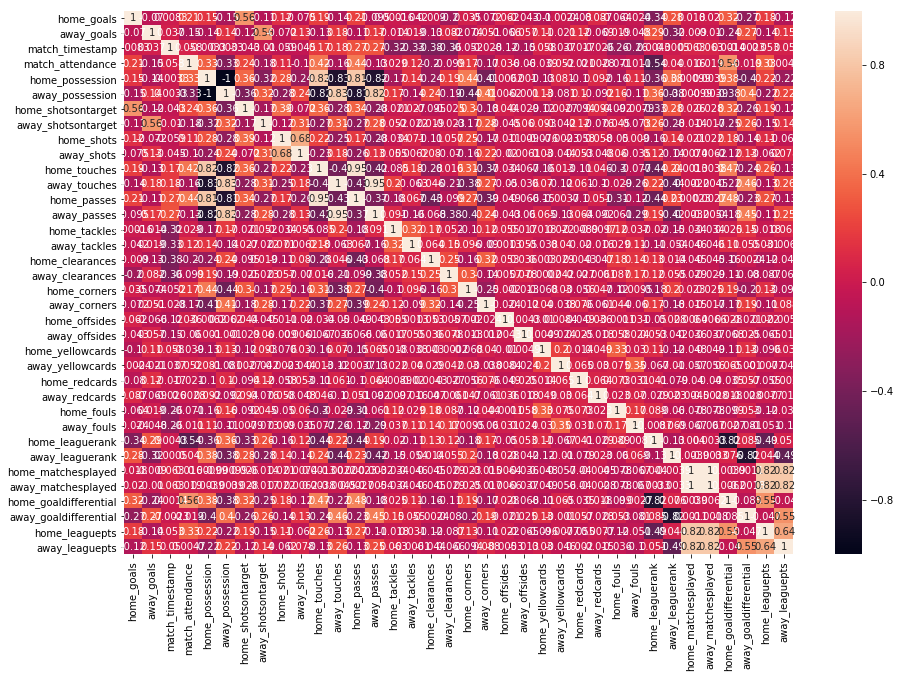

In [7]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot=True)

In [8]:
df_OHstadia = patsy.dmatrix('match_stadium',data=df,return_type='dataframe')

In [10]:
df = df.join(df_OHstadia)

In [66]:
df_n = df[(df['match_stadium'] != "Old Trafford, Manchester")&(df['match_stadium'] != "Wembley Stadium, London")&(df['match_stadium'] != "")]

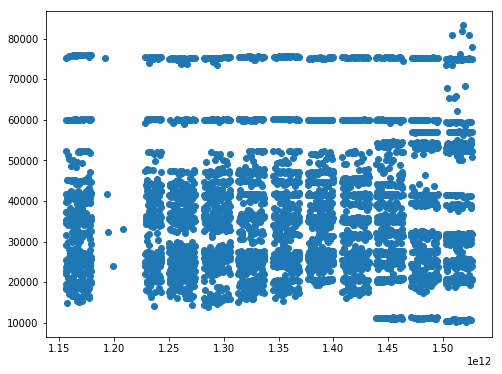

In [67]:
plt.figure(figsize=[8,6])
plt.scatter(df['match_timestamp'], df['match_attendance'])

In [69]:
lsm = smf.ols('match_attendance ~ match_stadium \
                                *(home_leaguerank + away_leaguerank + home_goaldifferential)'',
              data = df)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     3824.
Date:                Fri, 13 Jul 2018   Prob (F-statistic):               0.00
Time:                        16:04:34   Log-Likelihood:                -36722.
No. Observations:                4015   AIC:                         7.353e+04
Df Residuals:                    3970   BIC:                         7.382e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================
                                                          coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------
Intercept                                             3.04e+04    523.631     58.061      0.000    2.94e+04    3.14e+04
match_stadium[T.Anfield, Liverpool]                  1.538e+04    547.939     28.076      0.000    1.43e+04    1.65e+04
match_stadium[T.Bloomfield Road, Blackpool]         -1.462e+04    740.526    -19.747      0.000   -1.61e+04   -1.32e+04
match_stadium[T.Boleyn Ground, London]               3963.7354    557.333      7.112      0.000    2871.050    5056.421
match_stadium[T.Bramall Lane, Sheffield]              277.7368    740.526      0.375      0.708   -1174.109    1729.583
match_stadium[T.Britannia Stadium, Stoke]           -2981.6842   2341.748     -1.273      0.203   -7572.825    1609.457
match_stadium[T.Cardiff City Stadium, Cardiff]      -2972.9474    740.526     -4.015      0.000   -4424.794   -1521.101
match_stadium[T.Carrow Road, Norwich]               -3638.9605    585.437     -6.216      0.000   -4786.746   -2491.175
match_stadium[T.Craven Cottage, London]             -5921.6442    562.019    -10.536      0.000   -7023.518   -4819.770
match_stadium[T.DW Stadium, Wigan]                   -1.21e+04    568.627    -21.286      0.000   -1.32e+04    -1.1e+04
match_stadium[T.Emirates Stadium, London]            2.954e+04    547.473     53.948      0.000    2.85e+04    3.06e+04
match_stadium[T.Etihad Stadium, Manchester]          1.729e+04    548.058     31.541      0.000    1.62e+04    1.84e+04
match_stadium[T.Ewood Park, Blackburn]              -6727.6615    577.399    -11.652      0.000   -7859.687   -5595.636
match_stadium[T.Fratton Park, Portsmouth]           -1.114e+04    620.509    -17.958      0.000   -1.24e+04   -9926.414
match_stadium[T.Goldsands Stadium, Bournemouth]     -1.921e+04    740.526    -25.946      0.000   -2.07e+04   -1.78e+04
match_stadium[T.Goodison Park, Liverpool]            6693.3358    547.939     12.215      0.000    5619.068    7767.604
match_stadium[T.John Smith's Stadium, Huddersfield] -6371.0000    740.526     -8.603      0.000   -7822.846   -4919.154
match_stadium[T.KCOM Stadium, Hull]                 -7004.7540    578.590    -12.107      0.000   -8139.114   -5870.394
match_stadium[T.King Power Stadium, Leicester]       1407.9605    585.437      2.405      0.016     260.175    2555.746
match_stadium[T.Liberty Stadium, Swansea]           -9941.1278    559.785    -17.759      0.000    -1.1e+04   -8843.635
match_stadium[T.Loftus Road, London]                -1.277e+04    604.637    -21.128      0.000    -1.4e+04   -1.16e+04
match_stadium[T.London Stadium, London]              2.653e+04    641.314     41.361      0.000    2.53e+04    2.78e+04
match_stadium[T.Macron Stadium, Bolton]             -7481.0251    577.399    -12.95

In [62]:
df.groupby(['match_stadium'])['match_attendance'].mean().sort_values()

match_stadium
Vitality Stadium, Bournemouth         10911.526316
Goldsands Stadium, Bournemouth        11188.736842
Bloomfield Road, Blackpool            15779.736842
Loftus Road, London                   17627.894737
DW Stadium, Wigan                     18298.792453
Fratton Park, Portsmouth              19259.723404
Vicarage Road, Watford                20071.907895
Turf Moor, Burnley                    20256.960000
Liberty Stadium, Swansea              20461.556391
Macron Stadium, Bolton                22921.659091
KCOM Stadium, Hull                    23397.930233
Ewood Park, Blackburn                 23675.022727
Madejski Stadium, Reading             23819.794872
John Smith's Stadium, Huddersfield    24031.684211
Craven Cottage, London                24481.040000
Selhurst Park, London                 24678.915789
The Hawthorns, West Bromwich          24828.160494
St Andrews, Birmingham                25354.078947
The Valley, London                    26194.631579
Carrow Road, Norw

In [71]:
df_Pool = df[df['match_stadium'] == "Anfield, Liverpool"]

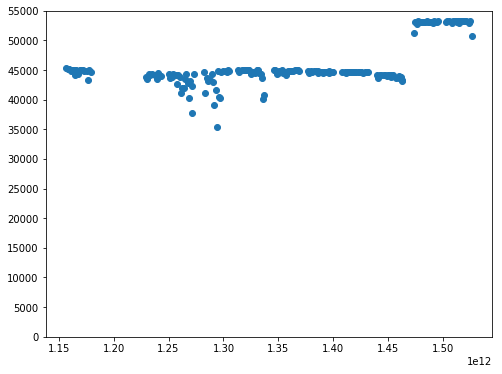

In [84]:
plt.figure(figsize=[8,6])
plt.ylim(ymin=0)
plt.yticks(np.arange(0,60000,5000))
plt.scatter(df_Pool['match_timestamp'], df_Pool['match_attendance'])

In [73]:
lsm = smf.ols('match_attendance ~ match_stadium \
                                *(home_leaguerank + away_leaguerank + home_goaldifferential)',
              data = df_Pool)
fit3 = lsm.fit()
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.132
Date:                Fri, 13 Jul 2018   Prob (F-statistic):           1.10e-05
Time:                        16:09:10   Log-Likelihood:                -1915.4
No. Observations:                 200   AIC:                             3839.
Df Residuals:                     196   BIC:                             3852.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              4.704e+04   1027.379     45.782      0.000     4.5e+04    4.91e+04
home_leaguerank        -279.8281     98.498     -2.841      0.005    -474.081     -85.575
away_leaguerank           8.0143     44.793      0.179      0.858     -80.325      96.353
home_goaldifferential    31.6188     25.311      1.249      0.213     -18.298      81.536
==============================================================================
Omnibus:                       17.092   Durbin-Watson:                   0.246
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.596
Skew:                           0.767   Prob(JB):                     5.56e-05
Kurtosis:                       3.017   Cond. No.                         84.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
df['match_stadium'].value_counts()

Emirates Stadium, London              229
Goodison Park, Liverpool              228
Stamford Bridge, London               228
Old Trafford, Manchester              228
Anfield, Liverpool                    228
Etihad Stadium, Manchester            227
White Hart Lane, London               209
Stadium of Light, Sunderland          190
Villa Park, Birmingham                190
bet365 Stadium, Stoke                 189
The Hawthorns, West Bromwich          171
Boleyn Ground, London                 170
Craven Cottage, London                152
DW Stadium, Wigan                     133
Liberty Stadium, Swansea              133
St. Mary's Stadium, Southampton       114
Macron Stadium, Bolton                114
Ewood Park, Blackburn                 114
St. James' Park, Newcastle            113
Selhurst Park, London                  95
KCOM Stadium, Hull                     95
Sports Direct Arena, Newcastle         76
Carrow Road, Norwich                   76
King Power Stadium, Leicester     

In [90]:
df_Sund = df[df['match_stadium'] == 'Stadium of Light, Sunderland']

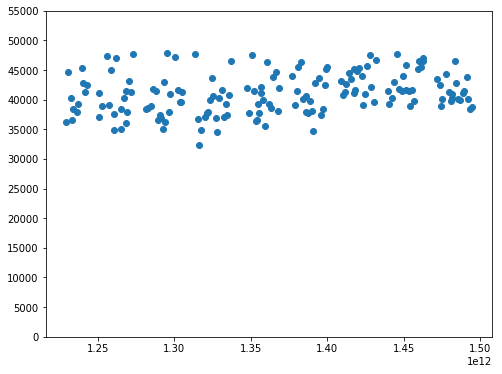

In [91]:
plt.figure(figsize=[8,6])
plt.ylim(ymin=0)
plt.yticks(np.arange(0,60000,5000))
plt.scatter(df_Sund['match_timestamp'], df_Sund['match_attendance'])

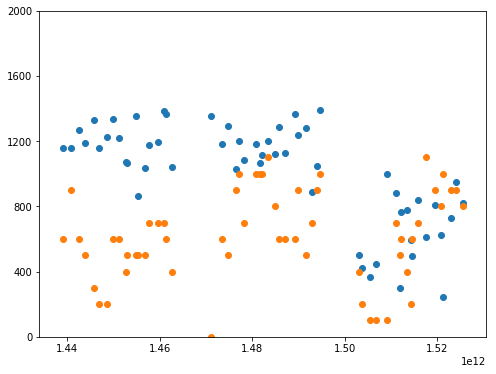

In [21]:
plt.figure(figsize=[8,6])
plt.ylim(ymin=0)
plt.yticks(np.arange(0,2100,400))
plt.scatter(df[df['hometeam_name'] == 'AFC Bournemouth']['match_timestamp'], (df[df['hometeam_name'] == 'AFC Bournemouth']['match_attendance']- 10000))
plt.scatter(df[df['hometeam_name'] == 'AFC Bournemouth']['match_timestamp'], (20 - df[df['hometeam_name'] == 'AFC Bournemouth']['home_leaguerank'])*100)

In [23]:
df[df['match_stadium'] == 'Wembley Stadium, London']['match_attendance'].mean()

68052.0